<h1 align='center'> Guia de Prática 4: <h1>

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

<h3 align='center'> Função de transferência do sistema: <h3>

In [2]:
s = ct.tf('s')

G = ((s+1)**-3)

G

TransferFunction(array([1]), array([1, 3, 3, 1]))

<h3 align='center'> Controlador PID Paralelo: <h3>

In [3]:
kp = 2
ti = 2.5
td = 0.5

s = ct.tf('s')
Cp = (((kp*s)+(kp/ti)+(kp*td*(s**2)))/s)

Cp

TransferFunction(array([1. , 2. , 0.8]), array([1, 0]))

<h3 align='center'> Controlador PID Série: <h3>

In [4]:
def getSeries(kp, ti, td):
    kp_ = ((kp/2)*(1+np.sqrt(1-((4*td)/ti))))
    ti_ = ((ti/2)*(1+np.sqrt(1-((4*td)/ti))))
    td_ = ((ti/2)*(1-np.sqrt(1-((4*td)/ti))))
    return (kp_, ti_, td_)

In [5]:
kp_,ti_,td_ = getSeries(kp, ti, td)

s = ct.tf('s')
Cs = (kp_*(1+(1/(ti_*s)))*(1+(td_*s)))

Cs

TransferFunction(array([1.80901699, 3.61803399, 1.4472136 ]), array([1.80901699, 0.        ]))

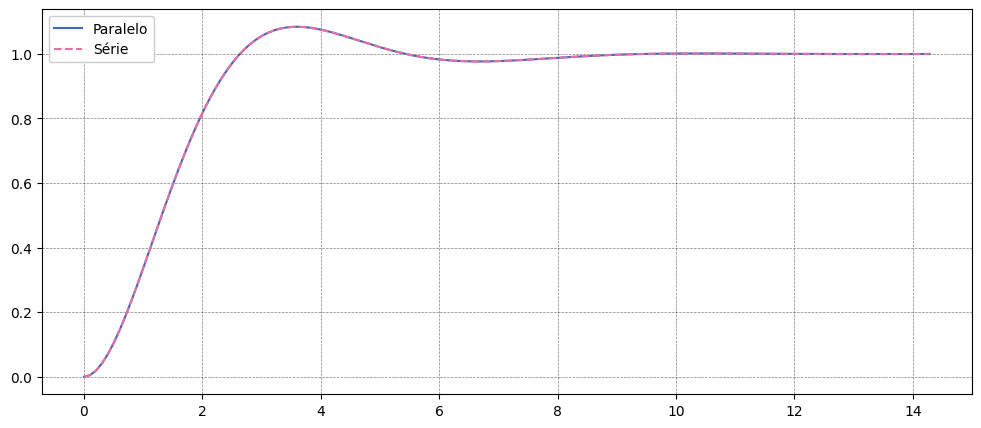

In [7]:
sol1 = ct.step_response(ct.feedback(Cp*G))
sol2 = ct.step_response(ct.feedback(Cs*G))

plt.figure()
plt.plot(sol1[0], sol1[1], label='Paralelo')
plt.plot(sol2[0], sol2[1], linestyle='dashed', label='Série')
plt.legend()
plt.show()

<h3 align='center'>Simular as duas opções de anti-windup (algébrico e lógico) <h3>